In [1]:
import sys 
sys.path.append('../')

import torch 
import matplotlib.pyplot as plt
from utils import * 
from mlmm import *
from dataset import reference_test

In [2]:
# torch.set_printoptions(sci_mode=False)
# np.set_printoptions(formatter={'float_kind':'{:0.2e}'.format})

In [3]:
l = 13 # number of level, total number of points is 2^l-1
k = 5 # number of corase level
m = 7 # local range for correction
order = 2 # order of interpolation/restriction

#### MLMM accuracy test

In [4]:
kernels = ['cosine', 'lnabs', 'laplace', 'helmholtz']

In [5]:
for kernel in kernels:
    uh, Khh, h, wh_numeric, wh_analytic, xh = reference_test(l, kernel)
    wh_smooth_ml, KHH = SmoothKernelMLMM_full(uh, Khh, h, k, order)
    l1 = l1_norm(wh_smooth_ml[-1], wh_numeric)
    rl2 = rl2_error(wh_smooth_ml[-1], wh_numeric)
    print("{:}-smooth : L1 - {:.2e}, rL2 - {:.2e}".format(kernel, l1, rl2))
    wh_singular_ml, KHH, Khh_banddiff_lst, boundary_lst, idx_j_lst = SingularSmoothKernelMLMM_local(uh, Khh, h, k, order, m)
    l1 = l1_norm(wh_singular_ml[-1], wh_numeric)
    rl2 = rl2_error(wh_singular_ml[-1], wh_numeric)
    print("{:}-singular : L1 - {:.2e}, rL2 - {:.2e}".format(kernel, l1, rl2))
    print('--------------------------------------')

cosine-smooth : L1 - 2.13e-05, rL2 - 2.57e-05
cosine-singular : L1 - 2.03e-05, rL2 - 2.44e-05
--------------------------------------
lnabs-smooth : L1 - 7.24e+01, rL2 - 4.23e-01
lnabs-singular : L1 - 3.25e-01, rL2 - 2.55e-03
--------------------------------------
laplace-smooth : L1 - 1.06e-07, rL2 - 3.55e-05
laplace-singular : L1 - 1.12e-09, rL2 - 3.44e-07
--------------------------------------
helmholtz-smooth : L1 - 2.57e-06, rL2 - 5.24e-04
helmholtz-singular : L1 - 2.70e-06, rL2 - 6.24e-04
--------------------------------------


#### MLMM accuracy on different range of local correction
wider local correction range will give better accuracy on "cosine", "lnabs"

In [6]:
l = 13 # number of level, total number of points is 2^l-1
k = 5 # number of corase level
order = 2 # order of interpolation/restriction

for kernel in ['cosine', 'lnabs', 'laplace']:
    for m in [3, 7, 15, 31]:
        uh, Khh, h, wh_numeric, wh_analytic, xh = reference_test(l, kernel)
        wh_singular_ml, KHH, Khh_banddiff_lst, boundary_lst, idx_j_lst = SingularSmoothKernelMLMM_local(uh, Khh, h, k, order, m=m)
        l1 = l1_norm(wh_singular_ml[-1], wh_numeric)
        rl2 = rl2_error(wh_singular_ml[-1], wh_numeric)
        print("{:}-singular m-{:} : L1 - {:.2e}, rL2 - {:.2e}".format(kernel, m, l1, rl2))
    print('------------------------------------------------------')

cosine-singular m-3 : L1 - 2.08e-05, rL2 - 2.51e-05
cosine-singular m-7 : L1 - 2.03e-05, rL2 - 2.44e-05
cosine-singular m-15 : L1 - 1.92e-05, rL2 - 2.30e-05
cosine-singular m-31 : L1 - 1.71e-05, rL2 - 2.03e-05
------------------------------------------------------
lnabs-singular m-3 : L1 - 4.31e-01, rL2 - 3.04e-03
lnabs-singular m-7 : L1 - 3.25e-01, rL2 - 2.55e-03
lnabs-singular m-15 : L1 - 2.75e-01, rL2 - 2.35e-03
lnabs-singular m-31 : L1 - 2.51e-01, rL2 - 2.26e-03
------------------------------------------------------
laplace-singular m-3 : L1 - 1.12e-09, rL2 - 3.44e-07
laplace-singular m-7 : L1 - 1.12e-09, rL2 - 3.44e-07
laplace-singular m-15 : L1 - 1.12e-09, rL2 - 3.44e-07
laplace-singular m-31 : L1 - 1.12e-09, rL2 - 3.44e-07
------------------------------------------------------


#### MLMM accuracy on different level of coarse

In [7]:
l = 13 # number of level, total number of points is 2^l-1
m = 7 # number of corase level
order = 2 # order of interpolation/restriction

for kernel in ['cosine', 'lnabs', 'laplace']:
    for k in [1, 2, 3, 4, 5]:
        uh, Khh, h, wh_numeric, wh_analytic, xh = reference_test(l, kernel)
        wh_singular_ml, KHH, Khh_banddiff_lst, boundary_lst, idx_j_lst = SingularSmoothKernelMLMM_local(uh, Khh, h, k=k, order=order, m=m)
        l1 = l1_norm(wh_singular_ml[-1], wh_numeric)
        rl2 = rl2_error(wh_singular_ml[-1], wh_numeric)
        print("{:}-singular k-{:} : L1 - {:.2e}, rL2 - {:.2e}".format(kernel, k, l1, rl2))
    print('------------------------------------------------------')

cosine-singular k-1 : L1 - 3.19e-07, rL2 - 4.61e-07
cosine-singular k-2 : L1 - 3.98e-07, rL2 - 5.61e-07
cosine-singular k-3 : L1 - 1.31e-06, rL2 - 1.63e-06
cosine-singular k-4 : L1 - 5.18e-06, rL2 - 6.26e-06
cosine-singular k-5 : L1 - 2.03e-05, rL2 - 2.44e-05
------------------------------------------------------
lnabs-singular k-1 : L1 - 1.08e-02, rL2 - 8.78e-05
lnabs-singular k-2 : L1 - 3.24e-02, rL2 - 2.61e-04
lnabs-singular k-3 : L1 - 7.52e-02, rL2 - 6.02e-04
lnabs-singular k-4 : L1 - 1.60e-01, rL2 - 1.27e-03
lnabs-singular k-5 : L1 - 3.25e-01, rL2 - 2.55e-03
------------------------------------------------------
laplace-singular k-1 : L1 - 1.33e-09, rL2 - 4.11e-07
laplace-singular k-2 : L1 - 1.21e-09, rL2 - 3.70e-07
laplace-singular k-3 : L1 - 1.15e-09, rL2 - 3.52e-07
laplace-singular k-4 : L1 - 1.12e-09, rL2 - 3.45e-07
laplace-singular k-5 : L1 - 1.12e-09, rL2 - 3.44e-07
------------------------------------------------------


MLMM speed test

In [9]:
k = 3
order=2
m =7
wh_singular_ml, KHH, Khh_banddiff_lst, boundary_lst, idx_j_lst = SingularSmoothKernelMLMM_local(uh, Khh, h, k, order, m)

In [10]:
%%timeit 
wh = multi_summation(Khh, uh, h)

16.5 ms ± 59.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
%%timeit
wh_mlmm = SmoothKernelMLMM(KHH, uh, h, k)

754 µs ± 6.57 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [13]:
%%timeit
wh_ml, KHH = SingularSmoothKernelMLMM_full(uh, Khh, h, k, order)

891 ms ± 10.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%%timeit
wh_mlmm = SingularSmoothKernelMLMM(KHH, uh, Khh_banddiff_lst, boundary_lst, idx_j_lst, h, k=k)

2.84 ms ± 20.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Kernel Reconstruction

In [45]:
l = 8 
k = 5
m = 15
order = 2
uh, Khh, h, wh_numeric, wh_analytic, xh = reference_test(l, 'lnabs')
wh_singular_ml, KHH, Khh_banddiff_lst, idx_j_lst = SingularSmoothKernelMLMM_local(uh, Khh, h, k, order, m)

In [46]:
wh_singular_ml, KHH, Khh_banddiff_lst, idx_j_lst = SingularSmoothKernelMLMM_local(uh, Khh, h, k, order, m)
Khh_smooth = SmoothKernelReconstruction(KHH, l, k)
rl2 = matrl2_error(Khh_smooth[-1][0,0], Khh[0,0]).item()
print(f'smooth reconstruction : {rl2}')

Khh_singular = SingularSmoothKernelReconstruction(KHH, Khh_banddiff_lst, l, k, m)
rl2 = matrl2_error(Khh_singular[-1][0,0], Khh[0,0]).item()
print(f"singular smooth reconstruction : {rl2}")

smooth reconstruction : 3.833512544631958
singular smooth reconstruction : 2.4192678928375244


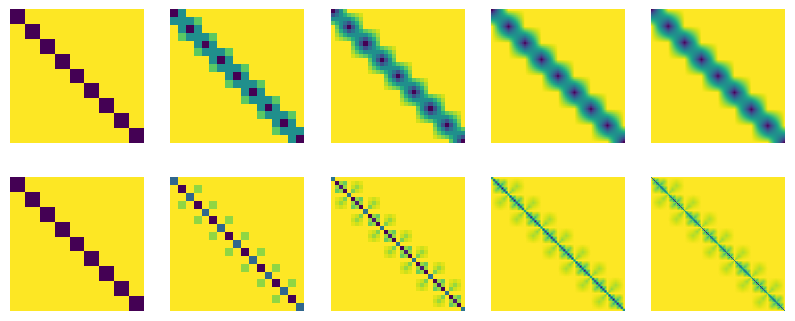

In [47]:
fig, axs = plt.subplots(2, k, figsize=(10, 4))
for i in range(k):
    axs[0,i].imshow(Khh_smooth[i][0,0])
    axs[0,i].axis('off')
    axs[1,i].imshow(Khh_singular[i][0,0])
    axs[1,i].axis('off')

local correction SVD : S is usually small, therefore correction is always low-rank